In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
%matplotlib inline

In [179]:
from sklearn.datasets import load_iris

In [180]:
iris_data = load_iris()

In [181]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [182]:
iris_dataset = pd.DataFrame(iris_data.data,columns=  iris_data.feature_names)

In [183]:
iris_dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [212]:
df = iris_dataset[['sepal length (cm)','petal length (cm)']]

In [213]:
df

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [214]:
from sklearn.cluster import KMeans

In [215]:
knn  = KMeans(n_clusters=3)

In [216]:
yPred = knn.fit_predict(df)

In [217]:
knn.cluster_centers_

array([[5.87413793, 4.39310345],
       [5.00784314, 1.49215686],
       [6.83902439, 5.67804878]])

In [218]:
knn.inertia_

53.809978644106934

In [219]:
df['Cluster'] = yPred

c:\users\kobalaji\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [220]:
df

,sepal length (cm),petal length (cm),Cluster
0,5.1,1.4,1
1,4.9,1.4,1
2,4.7,1.3,1
3,4.6,1.5,1
4,5.0,1.4,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,0
147,6.5,5.2,2
148,6.2,5.4,2


In [221]:
df1 = df[df['Cluster']==0]
df2 = df[df['Cluster']==1]
df3 = df[df['Cluster']==2]

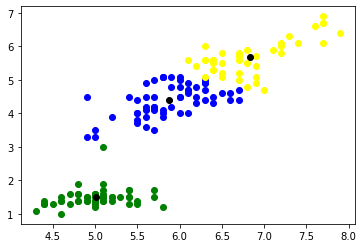

In [223]:
plt.scatter(df1['sepal length (cm)'],df1['petal length (cm)'],color='blue')
plt.scatter(df2['sepal length (cm)'],df2['petal length (cm)'],color='Green')
plt.scatter(df3['sepal length (cm)'],df3['petal length (cm)'],color='Yellow')
plt.scatter(knn.cluster_centers_[:,0],knn.cluster_centers_[:,1],color='black')

In [224]:
from sklearn.metrics import silhouette_score
labels = knn.labels_


In [225]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [226]:
silhouette_score(df,labels)

0.7333245892124939

In [227]:
sse =[]
krange = range(1,10)
for i in krange:
    knn  = KMeans(n_clusters=i)
    knn.fit_predict(df)
    sse.append(knn.inertia_)

In [228]:
sse

[663.5670666666667,
 209.76498346625175,
 53.809978644106934,
 40.20130487804879,
 26.776689655172415,
 22.954920424403184,
 19.549936198951215,
 17.029337813620074,
 14.74265258735073]

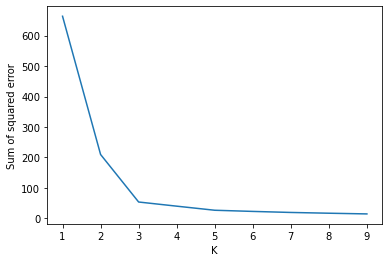

In [229]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(krange,sse)

In [230]:
from sklearn.metrics import silhouette_score
sse =[]
krange = range(1,10)
for i in krange:
    knn  = KMeans(n_clusters=i)
    knn.fit_predict(df)
    sse.append(knn.inertia_)
labels = knn.labels_
silhouette = silhouette_score(df,labels)
print(silhouette)
print("\n")
print(sse)

0.424389723385926


[663.5670666666667, 209.76498346625175, 53.809978644106934, 40.20130487804879, 26.776689655172415, 23.02234207682484, 20.55276114020912, 16.984443874226137, 14.579613636363637]


In [231]:
sse

[663.5670666666667,
 209.76498346625175,
 53.809978644106934,
 40.20130487804879,
 26.776689655172415,
 23.02234207682484,
 20.55276114020912,
 16.984443874226137,
 14.579613636363637]